# Assignment 2: Machine Learning

## 1. Pick one use case

Predict passenger data for Ruter

## 2. Explore and research which algorithm would work best for this use case (regression or classification)

Regression

## 3. Document your findings in a file (3-5 lines) on why you chose this algorithm

I chose regression based on what kind of data we are going to predict.
While classification algorithms are suited for discrete data (data that can be divided into categories),
regression algorithms are suited for continous data (data that go on a continous scale).
The attribute "number of passengers" is going to be predicted, which is continous data, therefore I chose to use a regression algorithm.

## 4. Train the algorithm using Python

In [1]:
# Import modules

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import datetime as dt
import pickle

# Import data

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=';')

In [2]:
# Convert date attribute to a numeric type 

df['Dato_numeric'] = pd.to_datetime(df['Dato'], dayfirst=True)
df['Dato_numeric'] = df['Dato_numeric'].map(dt.datetime.toordinal)

In [3]:
# Extract input (date) and output (passengers) variables, using only entries for bus number 100

X = pd.DataFrame(df['Dato_numeric'].loc[df['Linjenavn'] == '100'])
y = pd.DataFrame(df['Passasjerer_Ombord'].loc[df['Linjenavn'] == '100'])

In [4]:
# split the set into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

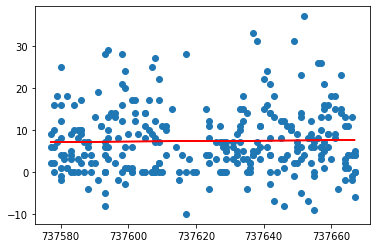

Prediction percentage score (MSE) = 61.09323494155206


In [5]:
# train the algorithm

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "Prediction percentage score (MSE) = "+str(metrics.mean_squared_error(y_train,Y_pred)))

In [6]:
# make some predictions

# function that makes it easier to make predictions
# takes in an input date and converts it to a numeric value, since the model requires the date to be a numeric value
# takes in a model, so we can use the function later when loading a model
def make_prediction(input_date, model):
    
    date_numeric = pd.to_datetime(input_date, dayfirst=True) 
    date_numeric = date_numeric.toordinal()
    
    pred = model.predict([[date_numeric]])
    
    print(f"Number of passengers on {input_date}: {pred[0][0]}")

make_prediction('30/09/2020', linear_regressor)
make_prediction('1/12/2020', linear_regressor)
make_prediction('5/5/2021', linear_regressor)
make_prediction('20/08/2022', linear_regressor)

Number of passengers on 30/09/2020: 7.715814770713678
Number of passengers on 1/12/2020: 8.036292182709076
Number of passengers on 5/5/2021: 8.837485712696889
Number of passengers on 20/08/2022: 11.277249236272837


In [7]:
# save the model

pickle.dump(linear_regressor, open('regression_passengers.sav', 'wb'))

In [8]:
# load model and test if it works

loaded_model = pickle.load(open('regression_passengers.sav', 'rb'))

make_prediction('30/09/2020', loaded_model)

Number of passengers on 30/09/2020: 7.715814770713678
